In [21]:
import numpy as np
import nltk 
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import RegexpParser 
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
#nltk.download('averaged_perceptron_tagger')

In [165]:
# Read file
with open("input_1.txt","r",encoding="utf8") as f:
    content = f.readlines()
content = content[0].split(".")
print(content)

['Bangladesh authorities are arbitrarily arresting government critics under the draconian Digital Security Act,stifling civil society, independent media, and human rights activists', ' There are serious and numerous allegations of torture, extrajudicial killings, and enforced disappearances by security forces that continue to operate with near complete impunity', 'Though Bangladesh has upheld its international obligations not to forcibly return Rohingya refugees to Myanmar, the government has adopted severely repressive measures denying refugees their rights to information, education, and health, and has detained hundreds of refugees on a flood-prone silt island in the Bay of Bengal without freedom of movement or access to critical humanitarian and protection services', 'Authorities fail to protect LGBT people, religious minorities, and indigenous populations', 'Women and girls face widespread violence and sexual assault without reliable protection or legal recourse', ' Bangladesh has 

In [178]:
# Text formation,Tokenization

article_text = ''
for p in content:
    article_text += p
#print(article_text)

sentence_token = nltk.sent_tokenize(article_text)
#print(corpus)

for i in range(len(sentence_token )):
    sentence_token [i] = sentence_token [i].lower()
    sentence_token [i] = re.sub(r'\W',' ',sentence_token [i])
    sentence_token [i] = re.sub(r'\s+',' ',sentence_token [i])
print (sentence_token)

['bangladesh authorities are arbitrarily arresting government critics under the draconian digital security act stifling civil society independent media and human rights activists there are serious and numerous allegations of torture extrajudicial killings and enforced disappearances by security forces that continue to operate with near complete impunitythough bangladesh has upheld its international obligations not to forcibly return rohingya refugees to myanmar the government has adopted severely repressive measures denying refugees their rights to information education and health and has detained hundreds of refugees on a flood prone silt island in the bay of bengal without freedom of movement or access to critical humanitarian and protection servicesauthorities fail to protect lgbt people religious minorities and indigenous populationswomen and girls face widespread violence and sexual assault without reliable protection or legal recourse bangladesh has one of the highest rates of ch

In [179]:
#df = pd.DataFrame()
#df.head()
# data_New = "".join(line.rstrip() for line in content)
# print(data_New)


In [180]:
#data_New = "".join(line.rstrip() for line in content)
#print(data_New)

#clean dta
# data_clean = re.sub(r'\[[0-9]*\]',' ',data_New)
# data_cleaned = re.sub(r'\s+',' ',data_clean)

# data_cleaned = re.sub(r'[^a-zA-Z]',' ',data_cleaned)
# sent = re.sub(r'\s+',' ',data_cleaned)
# print(sent)
# ## sentence make lowercase

# sent_new = sent.lower()
# print(sent_new)


In [183]:

#sentence tokenization
# sentence_token = nltk.sent_tokenize(data_cleaned)
# print(sentence_token)

#word tokenization 
word_token = nltk.word_tokenize(article_text)
print(word_token)


['Bangladesh', 'authorities', 'are', 'arbitrarily', 'arresting', 'government', 'critics', 'under', 'the', 'draconian', 'Digital', 'Security', 'Act', ',', 'stifling', 'civil', 'society', ',', 'independent', 'media', ',', 'and', 'human', 'rights', 'activists', 'There', 'are', 'serious', 'and', 'numerous', 'allegations', 'of', 'torture', ',', 'extrajudicial', 'killings', ',', 'and', 'enforced', 'disappearances', 'by', 'security', 'forces', 'that', 'continue', 'to', 'operate', 'with', 'near', 'complete', 'impunityThough', 'Bangladesh', 'has', 'upheld', 'its', 'international', 'obligations', 'not', 'to', 'forcibly', 'return', 'Rohingya', 'refugees', 'to', 'Myanmar', ',', 'the', 'government', 'has', 'adopted', 'severely', 'repressive', 'measures', 'denying', 'refugees', 'their', 'rights', 'to', 'information', ',', 'education', ',', 'and', 'health', ',', 'and', 'has', 'detained', 'hundreds', 'of', 'refugees', 'on', 'a', 'flood-prone', 'silt', 'island', 'in', 'the', 'Bay', 'of', 'Bengal', 'wit

In [184]:
#pos tag

tagged = nltk.pos_tag(word_token)
print(tagged)

[('Bangladesh', 'NNP'), ('authorities', 'NNS'), ('are', 'VBP'), ('arbitrarily', 'RB'), ('arresting', 'VBG'), ('government', 'NN'), ('critics', 'NNS'), ('under', 'IN'), ('the', 'DT'), ('draconian', 'JJ'), ('Digital', 'NNP'), ('Security', 'NNP'), ('Act', 'NNP'), (',', ','), ('stifling', 'VBG'), ('civil', 'JJ'), ('society', 'NN'), (',', ','), ('independent', 'JJ'), ('media', 'NNS'), (',', ','), ('and', 'CC'), ('human', 'JJ'), ('rights', 'NNS'), ('activists', 'NNS'), ('There', 'EX'), ('are', 'VBP'), ('serious', 'JJ'), ('and', 'CC'), ('numerous', 'JJ'), ('allegations', 'NNS'), ('of', 'IN'), ('torture', 'NN'), (',', ','), ('extrajudicial', 'JJ'), ('killings', 'NNS'), (',', ','), ('and', 'CC'), ('enforced', 'VBD'), ('disappearances', 'NNS'), ('by', 'IN'), ('security', 'NN'), ('forces', 'NNS'), ('that', 'WDT'), ('continue', 'VBP'), ('to', 'TO'), ('operate', 'VB'), ('with', 'IN'), ('near', 'JJ'), ('complete', 'JJ'), ('impunityThough', 'NN'), ('Bangladesh', 'NNP'), ('has', 'VBZ'), ('upheld', 'VB

In [185]:
##Extract all parts of speech from any text 
chunker = RegexpParser(""" 
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases 
                       P: {<IN>}               #To extract Prepositions 
                       V: {<V.*>}              #To extract Verbs 
                       PP: {<P> <NP>}          #To extract Prepostional Phrases 
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases 
                       """) 
  
# Print all parts of speech in above sentence 
output = chunker.parse(tagged) 
print("After Extracting\n", output)


After Extracting
 (S
  Bangladesh/NNP
  authorities/NNS
  (VP (V are/VBP))
  arbitrarily/RB
  (VP (V arresting/VBG) (NP government/NN))
  critics/NNS
  (P under/IN)
  the/DT
  draconian/JJ
  Digital/NNP
  Security/NNP
  Act/NNP
  ,/,
  (VP (V stifling/VBG) (NP civil/JJ society/NN))
  ,/,
  independent/JJ
  media/NNS
  ,/,
  and/CC
  human/JJ
  rights/NNS
  activists/NNS
  There/EX
  (VP (V are/VBP))
  serious/JJ
  and/CC
  numerous/JJ
  allegations/NNS
  (PP (P of/IN) (NP torture/NN))
  ,/,
  extrajudicial/JJ
  killings/NNS
  ,/,
  and/CC
  (VP (V enforced/VBD))
  disappearances/NNS
  (PP (P by/IN) (NP security/NN))
  forces/NNS
  that/WDT
  (VP (V continue/VBP))
  to/TO
  (VP
    (V operate/VB)
    (PP (P with/IN) (NP near/JJ complete/JJ impunityThough/NN)))
  Bangladesh/NNP
  (VP (V has/VBZ))
  (VP (V upheld/VBN))
  its/PRP$
  international/JJ
  obligations/NNS
  not/RB
  to/TO
  forcibly/RB
  (VP (V return/VB))
  Rohingya/NNP
  refugees/NNS
  to/TO
  Myanmar/NNP
  ,/,
  (NP the/DT g

In [28]:
# To draw the parse tree 
output.draw() 

In [186]:
# STemming frm word
ps = PorterStemmer()
for w in word_token: 
    print(w, " : ", ps.stem(w))

Bangladesh  :  bangladesh
authorities  :  author
are  :  are
arbitrarily  :  arbitrarili
arresting  :  arrest
government  :  govern
critics  :  critic
under  :  under
the  :  the
draconian  :  draconian
Digital  :  digit
Security  :  secur
Act  :  act
,  :  ,
stifling  :  stifl
civil  :  civil
society  :  societi
,  :  ,
independent  :  independ
media  :  media
,  :  ,
and  :  and
human  :  human
rights  :  right
activists  :  activist
There  :  there
are  :  are
serious  :  seriou
and  :  and
numerous  :  numer
allegations  :  alleg
of  :  of
torture  :  tortur
,  :  ,
extrajudicial  :  extrajudici
killings  :  kill
,  :  ,
and  :  and
enforced  :  enforc
disappearances  :  disappear
by  :  by
security  :  secur
forces  :  forc
that  :  that
continue  :  continu
to  :  to
operate  :  oper
with  :  with
near  :  near
complete  :  complet
impunityThough  :  impunitythough
Bangladesh  :  bangladesh
has  :  ha
upheld  :  upheld
its  :  it
international  :  intern
obligations  :  oblig
not

s  :  s
obligations  :  oblig
to  :  to
ensure  :  ensur
the  :  the
right  :  right
to  :  to
education  :  educ
under  :  under
the  :  the
Convention  :  convent
on  :  on
the  :  the
Rights  :  right
of  :  of
the  :  the
Child  :  child
and  :  and
other  :  other
human  :  human
rights  :  right
treaties  :  treati
,  :  ,
the  :  the
2018  :  2018
Global  :  global
Refugee  :  refuge
Compact  :  compact
,  :  ,
which  :  which
Bangladesh  :  bangladesh
endorsed  :  endors
,  :  ,
calls  :  call
for  :  for
the  :  the
integration  :  integr
of  :  of
refugee  :  refuge
children  :  children
into  :  into
national  :  nation
education  :  educ
systems  :  system


In [187]:
#stopwords removal 
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in word_token if not w in stop_words] 
filtered_sentence = [] 
for w in word_token:
    if w not in stop_words:
        filtered_sentence.append(w)
print(filtered_sentence)

['Bangladesh', 'authorities', 'arbitrarily', 'arresting', 'government', 'critics', 'draconian', 'Digital', 'Security', 'Act', ',', 'stifling', 'civil', 'society', ',', 'independent', 'media', ',', 'human', 'rights', 'activists', 'There', 'serious', 'numerous', 'allegations', 'torture', ',', 'extrajudicial', 'killings', ',', 'enforced', 'disappearances', 'security', 'forces', 'continue', 'operate', 'near', 'complete', 'impunityThough', 'Bangladesh', 'upheld', 'international', 'obligations', 'forcibly', 'return', 'Rohingya', 'refugees', 'Myanmar', ',', 'government', 'adopted', 'severely', 'repressive', 'measures', 'denying', 'refugees', 'rights', 'information', ',', 'education', ',', 'health', ',', 'detained', 'hundreds', 'refugees', 'flood-prone', 'silt', 'island', 'Bay', 'Bengal', 'without', 'freedom', 'movement', 'access', 'critical', 'humanitarian', 'protection', 'servicesAuthorities', 'fail', 'protect', 'LGBT', 'people', ',', 'religious', 'minorities', ',', 'indigenous', 'population

In [188]:
#word make sentence
sentence = " ".join([i for i in filtered_sentence])
print(sentence)

Bangladesh authorities arbitrarily arresting government critics draconian Digital Security Act , stifling civil society , independent media , human rights activists There serious numerous allegations torture , extrajudicial killings , enforced disappearances security forces continue operate near complete impunityThough Bangladesh upheld international obligations forcibly return Rohingya refugees Myanmar , government adopted severely repressive measures denying refugees rights information , education , health , detained hundreds refugees flood-prone silt island Bay Bengal without freedom movement access critical humanitarian protection servicesAuthorities fail protect LGBT people , religious minorities , indigenous populationsWomen girls face widespread violence sexual assault without reliable protection legal recourse Bangladesh one highest rates child marriage worldMohamed Tua Sin , 15 , class 9 Myanmar forced flee Bangladesh late August 2017Attacks Myanmar military forced 740,000 eth

In [189]:
#tf-idf vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(content)
print(vectorizer.get_feature_names())

['000', '100', '14', '15', '163', '2017', '2018', '300', '400', '740', 'able', 'abreast', 'abuses', 'access', 'account', 'accredited', 'act', 'activists', 'actors', 'addition', 'adequate', 'adopted', 'age', 'agencies', 'agreed', 'allegations', 'apparent', 'arbitrarily', 'arresting', 'asked', 'assault', 'assumption', 'attacks', 'august', 'authorities', 'backed', 'ban', 'bangla', 'bangladesh', 'bangladeshi', 'bans', 'barrier', 'barring', 'bars', 'based', 'bay', 'bengal', 'bengali', 'borders', 'buildings', 'calls', 'camp', 'campaign', 'camps', 'certificates', 'certified', 'change', 'child', 'children', 'choice', 'citizenship', 'civil', 'class', 'cleansing', 'clear', 'communities', 'community', 'compact', 'complete', 'continue', 'convention', 'countless', 'country', 'crimes', 'critical', 'critics', 'cross', 'curriculum', 'days', 'deliberate', 'deliberately', 'denying', 'deprivation', 'detained', 'devastating', 'digital', 'dignified', 'disappearances', 'does', 'donors', 'draconian', 'educat

In [190]:
#shapte print
#print(X.shape)
#X.reshape(-1,1)

In [191]:
#matrix print 
#print(X.toarray())

In [192]:
#print(X)
#cosine_similarity = 1 - distance.cosine(X[0], X[0])
#print(cosine_similarity)
from sklearn.metrics.pairwise import cosine_similarity
similar_matrix = cosine_similarity(X[0:1], X)
#print(similar_matrix)

cosine_similarity(X[0:1], X)

array([[1.        , 0.05549694, 0.05091104, 0.05875257, 0.        ,
        0.02588023, 0.01981334, 0.01424824, 0.        , 0.        ,
        0.01821935, 0.        , 0.07100091, 0.08431913, 0.03191248,
        0.        , 0.        , 0.        , 0.03047416, 0.        ,
        0.07555356, 0.02473057, 0.02516223, 0.02528058, 0.        ,
        0.05963678, 0.01956627, 0.04365221, 0.03439579, 0.03519637,
        0.01718338, 0.11975229, 0.        ]])

In [196]:
# visualize data
#X.reshape(-1,1)
x = np.array(X)
#print(x)
x.reshape(-1,1)
plt.scatter(x[:,0],x[:,1], label='True Position')

IndexError: too many indices for array

In [197]:
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X)
# print(kmeans.cluster_centers_)
summarized_para=""


true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
        summarized_para+=(str(terms[ind])+" ")


    print

print("\n")
print(summarized_para)

Top terms per cluster:
Cluster 0:
 teaching
 prohibits
 bangla
 language
 national
 children
 rohingya
 bangladesh
 enrolling
 ensure
 draconian
 enforced
 endorsed
 end
 ensuring
 efforts
 effect
 education
 ethnic
 examinations
Cluster 1:
 education
 rohingya
 bangladesh
 myanmar
 children
 refugees
 government
 school
 camps
 formal
 choice
 university
 bangladeshi
 refugee
 country
 curriculum
 rights
 said
 000
 humanitarian
Cluster 2:
 independent
 civil
 media
 arresting
 arbitrarily
 stifling
 activists
 act
 digital
 draconian
 critics
 security
 society
 human
 authorities
 rights
 government
 bangladesh
 ensuring
 ethnic


teaching prohibits bangla language national children rohingya bangladesh enrolling ensure draconian enforced endorsed end ensuring efforts effect education ethnic examinations education rohingya bangladesh myanmar children refugees government school camps formal choice university bangladeshi refugee country curriculum rights said 000 humanitarian independe

In [52]:
# print(kmeans.labels_)


[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 2 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 2 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 

In [150]:
# #T.ravel() 
# t1_single = np.reshape(x, -1)
# plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')


In [ ]:
#process 1 end
#process 2 tried

In [155]:

# article_text = []

# article = content[0].split(". ")
# #sentences = []

# for x in article:
#     #print(article)
#     article_text.append(x.replace("[^a-zA-Z]", " ").split(" "))
#     article_text.pop()


# #print(article_text[0])

# corpus = nltk.sent_tokenize(article_text)
# print(corpus)


article_text = ''
for p in content:
    article_text += p
#print(article_text)

corpus = nltk.sent_tokenize(article_text)
#print(corpus)

for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])
#print(corpus)

wordfreq = {}
for sen in corpus:
    tokens = nltk.word_tokenize(sen)
    #print(tokens)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1
#print(wordfreq)
import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)
#print(most_freq)

# calculate idf values
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in corpus:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(corpus)/(1 + doc_containing_word))
#print( word_idf_values)

#calculate tf values
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in corpus:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector
#print(word_tf_values)

#clculate tf-idf 
#vectorizer = TfidfVectorizer()

tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)
#print(tfidf_values)
tf_idf_model = np.asarray(tfidf_values)
tf_idf_model = np.transpose(tf_idf_model)
print(tf_idf_model)

[[0.01374004 0.         0.02256531 ... 0.         0.         0.        ]
 [0.00549602 0.01979485 0.0361045  ... 0.         0.         0.        ]
 [0.01889255 0.0170112  0.00775683 ... 0.         0.         0.        ]
 ...
 [0.02628529 0.0157785  0.02877895 ... 0.         0.         0.        ]
 [0.02667184 0.01067369 0.02920217 ... 0.         0.         0.        ]
 [0.04030412 0.0241937  0.01103193 ... 0.         0.         0.        ]]


In [118]:

from sklearn.metrics.pairwise import cosine_similarity
similar_matrix = cosine_similarity(tf_idf_model[0:1], tf_idf_model)
print(similar_matrix)

cosine_similarity(tf_idf_model[0:1], tf_idf_model)

[[1.         0.0789206  0.01163265 0.0013163  0.00347142 0.01456033
  0.         0.03848828 0.0837084  0.01316083 0.         0.
  0.0085651  0.00373775 0.06535825 0.01812478 0.01277037 0.00549274
  0.07417264 0.02600758 0.04917374 0.0232337  0.16003258]]


array([[1.        , 0.0789206 , 0.01163265, 0.0013163 , 0.00347142,
        0.01456033, 0.        , 0.03848828, 0.0837084 , 0.01316083,
        0.        , 0.        , 0.0085651 , 0.00373775, 0.06535825,
        0.01812478, 0.01277037, 0.00549274, 0.07417264, 0.02600758,
        0.04917374, 0.0232337 , 0.16003258]])

[[0.01374004 0.         0.02256531 ... 0.         0.         0.        ]
 [0.00549602 0.01979485 0.0361045  ... 0.         0.         0.        ]
 [0.01889255 0.0170112  0.00775683 ... 0.         0.         0.        ]
 ...
 [0.02628529 0.0157785  0.02877895 ... 0.         0.         0.        ]
 [0.02667184 0.01067369 0.02920217 ... 0.         0.         0.        ]
 [0.04030412 0.0241937  0.01103193 ... 0.         0.         0.        ]]


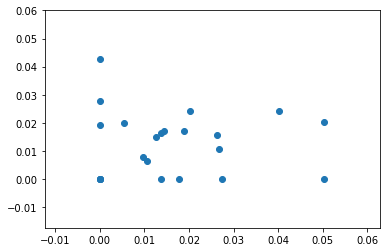

In [108]:
# visualize data
x = np.array(tf_idf_model)
print(x)
plt.scatter(x[:,0],x[:,1], label='True Position')

In [119]:
# kmeans = KMeans(n_clusters=3, random_state=0)
# x=x.reshape(-1,1)
# kmeans.fit(x)
#print(kmeans.cluster_centers_)
# print(kmeans.labels_)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [152]:
#plt.scatter(x[:,0],x[:,1], c=kmeans.labels_, cmap='rainbow')
#plt.scatter(x[:,0],x[:,1], c=[matplotlib.cm.spectral(float(i) /10) for i in cluster.labels_])  


In [202]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
#terms = tf_idf_model.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
terms_vectorized = vectorizer.transform(terms)
#print(terms_vectorized)
terms_prediction = model.predict(terms_vectorized)
#print(terms_prediction)

Top terms per cluster:
Cluster 0:
 teaching
 prohibits
 bangla
 language
 national
 children
 rohingya
 bangladesh
 enrolling
 ensure
Cluster 1:
 education
 rohingya
 bangladesh
 myanmar
 children
 refugees
 government
 school
 camps
 formal
Cluster 2:
 independent
 civil
 media
 arresting
 arbitrarily
 stifling
 activists
 act
 digital
 draconian




In [151]:
# #from textblob import TextBlob as tb
# from textblob import TextBlob
# zen = TextBlob(article_text)
# #print(zen)
# zen.sentences
